# Processamento dos Dados

- Extração de logs de Visualização
- Extração de logs de Instalação
- Identificação de registros repetidos
- Remoção de registros repetidos
- Junção dos dados de Visualização/Instalação e Cálculo do Score
- Prévia dos dados processados

In [401]:
import json
import pandas as pd
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

viewed_applications_log_file = 'data/viewed-applications-requests-20200709.csv'
installed_applications_log_file = 'data/installed-applications-requests-20200709.csv'

views_file = 'data/views.csv'
installations_file = 'data/installations.csv'
applications_by_terminals_file = 'data/applications-by-terminals.csv'

## Extração de logs de Visualização

Transformando logs de requisição de visualização em dados de visualização dos aplicativos por terminal.

**Log de Exemplo:**

```json
{
  "OperationController": "StoreApplicationsController",
  "OperationName": "GetApplicationDetailsAsync",
  "RemoteAddress": "::ffff:30.10.9.65",
  "RemotePort": 39800,
  "ElapsedTimeInSeconds": 0.08542036128989434,
  "AdditionalData": {
    "RequestMessage": {
      "TerminalIdentifier": {
        "Model": "F41000T",
        "Terminal": "48"
      },
      "Application": {
        "ApplicationId": "114",
        "ApplicationName": "Pague Aqui",
        "InternalName": "com.lausivsoft.partnershop",
        "Version": "1.2.1649",
        "Publisher": "PagueAqui"
      }
    }
  },
  "MachineName": "TMS-V-1P01",
  "Message": "Ended operation 'GetApplicationDetailsAsync' from 'StoreApplicationsController'.",
  "NativeProcessId": "4180",
  "ProcessName": "StoreApplications.API",
  "ProductName": "StoreApplications.API",
  "ProductVersion": "1.3.8.20154",
  "Severity": "Info",
  "Timestamp": "2020-07-09T21:52:31.605Z",
  "TraceKey": "cde76969-d1d3-4d04-a7c6-c480963c9b44",
  "TraceStack": [
    "cde76969-d1d3-4d04-a7c6-c480963c9b44"
  ],
  "TypeName": "OperationLogEntry",
  "SeverityCode": 6,
  "TimestampTicks": 1594331551605
}
```

In [402]:
def export_views_to_csv(source_file, destination_file):
    
    df = pd.read_csv(source_file)

    items = []
    for i, row in df.iterrows():
        jsonLogEntry = json.loads(row['LogEntry'])
        terminalIdentifier = jsonLogEntry['AdditionalData']['RequestMessage']['TerminalIdentifier']
        application = jsonLogEntry['AdditionalData']['RequestMessage']['Application']
        
        item = {}
        item['Terminal'] = terminalIdentifier['Terminal']
        item['ApplicationId'] = application['ApplicationId']

        items.append(item)

    df_output = pd.DataFrame(data=items)
    df_output.to_csv(destination_file, index=False)

In [403]:
export_views_to_csv(viewed_applications_log_file, views_file)

#### Dados extraídos

In [404]:
df = pd.read_csv(views_file)
df.describe()

,Terminal,ApplicationId
count,59778.000000,59778.000000
mean,2991.695390,106.862541
std,1219.885322,57.646678
min,62.000000,1.000000
25%,2108.000000,57.000000
50%,3004.000000,114.000000
75%,3876.000000,153.000000
max,5961.000000,221.000000


## Extração de logs de Instalação

Transformando logs de requisição de instalação em dados de instalação dos aplicativos por terminal.

**Log de Exemplo:**

```json
{
    "OperationController": "StoreApplicationsController",
    "OperationName": "GetAvailableApplicationsAsync",
    "RemoteAddress": "::ffff:30.10.9.65",
    "RemotePort": 39800,
    "ElapsedTimeInSeconds": 0.02837908089524317,
    "AdditionalData": {
        "RequestMessage": {
            "TerminalIdentifier": {
                "Model": "F41000T",
                "Terminal": "490"
            },
            "InstalledPackages": [
                {
                    "ApplicationId": "98",
                    "ApplicationName": "POS Controle",
                    "Version": "2.2.2478"
                },
                {
                    "ApplicationId": "144",
                    "ApplicationName": "Scheduler",
                    "Version": "1.2.4086"
                },
                {
                    "ApplicationId": "92",
                    "ApplicationName": "Launcher Piton",
                    "Version": "4.2.4092"
                },
                {
                    "ApplicationId": "26",
                    "ApplicationName": "Simular Venda",
                    "Version": "1.2.890"
                },
                {
                    "ApplicationId": "153",
                    "ApplicationName": "Time Machine",
                    "Version": "4.2.2590"
                },
                {
                    "ApplicationId": "131",
                    "ApplicationName": "Livance",
                    "Version": "1.2.718"
                },
                {
                    "ApplicationId": "25",
                    "ApplicationName": "Reimpressão",
                    "Version": "2.2.1926"
                },
                {
                    "ApplicationId": "150",
                    "ApplicationName": "CRC",
                    "Version": "2.2.2786"
                },
                {
                    "ApplicationId": "151",
                    "ApplicationName": "Pocket",
                    "Version": "2.2.3759"
                },
                {
                    "ApplicationId": "87",
                    "ApplicationName": "Calculadora Piton",
                    "Version": "3.2.1623"
                },
                {
                    "ApplicationId": "16",
                    "ApplicationName": "PDM",
                    "Version": "2.2.3825"
                },
                {
                    "ApplicationId": "210",
                    "ApplicationName": "Factory Package",
                    "Version": "1.2.4412"
                }
            ],
            "CurrentPage": 1,
            "RecordsPerPage": 10
        }
    },
    "MachineName": "V-1P02",
    "Message": "Ended operation 'GetAvailableApplicationsAsync' from 'StoreApplicationsController'.",
    "NativeProcessId": "4180",
    "ProcessName": "StoreApplications.API",
    "ProductName": "StoreApplications.API",
    "ProductVersion": "1.3.8.20154",
    "Severity": "Info",
    "Timestamp": "2020-07-12T12:46:34.359Z",
    "TraceKey": "e72bd495-ee5b-4bad-9fc7-7146794ce709",
    "TraceStack": [
        "e72bd495-ee5b-4bad-9fc7-7146794ce709"
    ],
    "TypeName": "OperationLogEntry",
    "SeverityCode": 6,
    "TimestampTicks": 1594557994359
}
```

In [405]:
def export_installations_to_csv(source_file, destination_file):
    
    df = pd.read_csv(source_file)

    items = []
    for i, row in df.iterrows():
        jsonLogEntry = json.loads(row['LogEntry'])
        terminalIdentifier = jsonLogEntry['AdditionalData']['RequestMessage']['TerminalIdentifier']
        installedPackages = jsonLogEntry['AdditionalData']['RequestMessage']['InstalledPackages']
        
        for j, installedPackage in enumerate(installedPackages):

            item = {}
            item['Terminal'] = terminalIdentifier['Terminal']
            item['ApplicationId'] = installedPackage['ApplicationId']
            items.append(item)
    
    df_output = pd.DataFrame(data=items)
    df_output.to_csv(destination_file, index=False)

In [406]:
export_installations_to_csv(installed_applications_log_file, installations_file)

#### Dados extraídos

In [407]:
df = pd.read_csv(installations_file)
df.describe()

,Terminal,ApplicationId
count,18232.000000,18232.000000
mean,2993.221753,106.938789
std,1260.665478,57.936260
min,62.000000,1.000000
25%,2082.000000,57.000000
50%,2973.000000,114.000000
75%,3871.000000,154.000000
max,5894.000000,221.000000


## Identificação de registros repetidos

In [408]:
def show_repeated_entries_overview(source_file):
    df = pd.read_csv(source_file)

    grouped_df = df.groupby(['Terminal', 'ApplicationId']).size() \
        .reset_index(name='counts')
    
    data = grouped_df['counts'].value_counts()

    print('Registros por ocorrência:')
    for key in data.keys():
        print(f'\t{key} ocorrência(s): {data[key]}')
    
def plot_repeated_entries_overview(source_file):

    df = pd.read_csv(source_file)

    grouped_df = df.groupby(['Terminal', 'ApplicationId']).size() \
        .reset_index(name='counts')
    
    data = grouped_df[grouped_df['counts']>1]['counts'].value_counts()
    
    fig, ax = plt.subplots()
    data.plot(ax=ax, kind='bar')
    plt.xlabel('Número de Repetições')
    plt.ylabel('Total de Registros')
    plt.title('Registros repetidos')
    plt.show()

#### Visualizações

Registros por ocorrência:
	1 ocorrência(s): 53637
	2 ocorrência(s): 2812
	3 ocorrência(s): 150
	4 ocorrência(s): 13
	5 ocorrência(s): 3


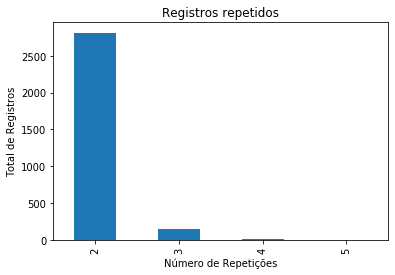

In [409]:
show_repeated_entries_overview(views_file)
plot_repeated_entries_overview(views_file)

#### Instalações

Registros por ocorrência:
	1 ocorrência(s): 17220
	2 ocorrência(s): 478
	3 ocorrência(s): 16
	4 ocorrência(s): 2


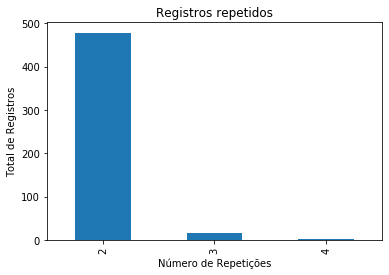

In [410]:
show_repeated_entries_overview(installations_file)
plot_repeated_entries_overview(installations_file)

## Remoção de registros repetidos

In [411]:
def remove_repeated_entries(source_file):
    df = pd.read_csv(source_file)

    df.drop_duplicates(['Terminal','ApplicationId'], keep= 'last') \
        .to_csv(source_file, columns=['Terminal', 'ApplicationId'], index = False)

In [412]:
remove_repeated_entries(installations_file)

show_repeated_entries_overview(installations_file)

Registros por ocorrência:
	1 ocorrência(s): 17716


## Junção dos dados de Visualização/Instalação e Cálculo do Score 

Nesta etapa, consolidamos os dados de visualização e instalação dos aplicativos. 
A arbitragem do **score** dos aplicativos foi feita com base nas visualizações e instalações, punindo os que foram muito visualizados e pouco instalados.

Para computar o **score**, primeiro calculamos a **relevância** do aplicativo que é a razão entre o total de instalações pelo total de visualizações. Em seguida, arbitramos um peso, onde a _visualização_ equivale a _1_ e _instalação_ a _3_. Por último multiplicamos o **peso** pela **relevância**.

```
Relevance = Installations / Views
Score = Weight * Relevance
```

In [413]:
def export_views_and_installations_to_csv(views_file, installations_file, destination_file):
    
    df_views = pd.read_csv(views_file)
    df_installations = pd.read_csv(installations_file)

    df_views['View'] = 1
    df_views['Installation'] = 0

    df_installations['View'] = 0
    df_installations['Installation'] = 1

    df_views_and_intallations = pd.concat([df_views, df_installations])
    
    application_relevance = get_application_relevance(df_views_and_intallations)

    grouped_multiple = df_views_and_intallations.groupby(['Terminal', 'ApplicationId'], as_index=False).agg({"View": "count", "Installation": "max"})
    
    items = []
    for i, row in grouped_multiple.iterrows():
        weight = 3 if row['Installation'] == 1 else 1
        relevance = application_relevance[row['ApplicationId']]

        item = {}
        item['Terminal'] = int(row['Terminal'])
        item['ApplicationId'] = int(row['ApplicationId'])
        item['Score'] = round(weight * relevance, 4)
        items.append(item)

    df_output = pd.DataFrame(data=items)

    df_output.to_csv(destination_file, index=False)

def get_application_relevance(df_views_and_intallations):
    df_grouped_applications = df_views_and_intallations.groupby(['ApplicationId'], as_index=False).agg({"View": "sum", "Installation": "sum"})

    application_relevance = {}
    for i, row in df_grouped_applications.iterrows():
        application_relevance[row['ApplicationId']] = row['Installation'] / row['View']

    return application_relevance    

In [414]:
export_views_and_installations_to_csv(views_file, installations_file, applications_by_terminals_file)

## Prévia dos dados processados

In [415]:
df = pd.read_csv(applications_by_terminals_file)

df.head()

,Terminal,ApplicationId,Score
0,62,3,1.0244
1,62,6,0.9426
2,62,8,0.9392
3,62,11,0.8012
4,62,19,0.9196
